In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

link to the file: 'https://drive.google.com/file/d/1aOuKSB9DxK5GEW-OuWbgsMSxWyIyz15x/view?usp=drive_link'
name : 'h8_data_csv'

In [3]:
data = pd.read_csv('h8_data.csv')
data.head()

year   jan       feb   mar   apr   may   jun   jul   aug   sep   oct   nov  \
0  1992  5618  7205.000  7446  7420  8076  7692  4395  7045  7058  8219  7432   
1  1993  7091  8339.000  8231  7772  8012  8015  3831  6246  7399  8546  8186   
2  1994  7986  9482.000  9215  9092  9346  9653  4748  8832  9194  9583  9573   
3  1995  8541    10.048  9796  8781  8851  8877  4207  7898  8999  9167  8333   
4  1996  7379  8852.000  7817  8688  8993  8521  4900  7837  8895  8739  8213   

      dec  
0  6427.0  
1  7267.0  
2  8560.0  
3  7236.0  
4  6425.0

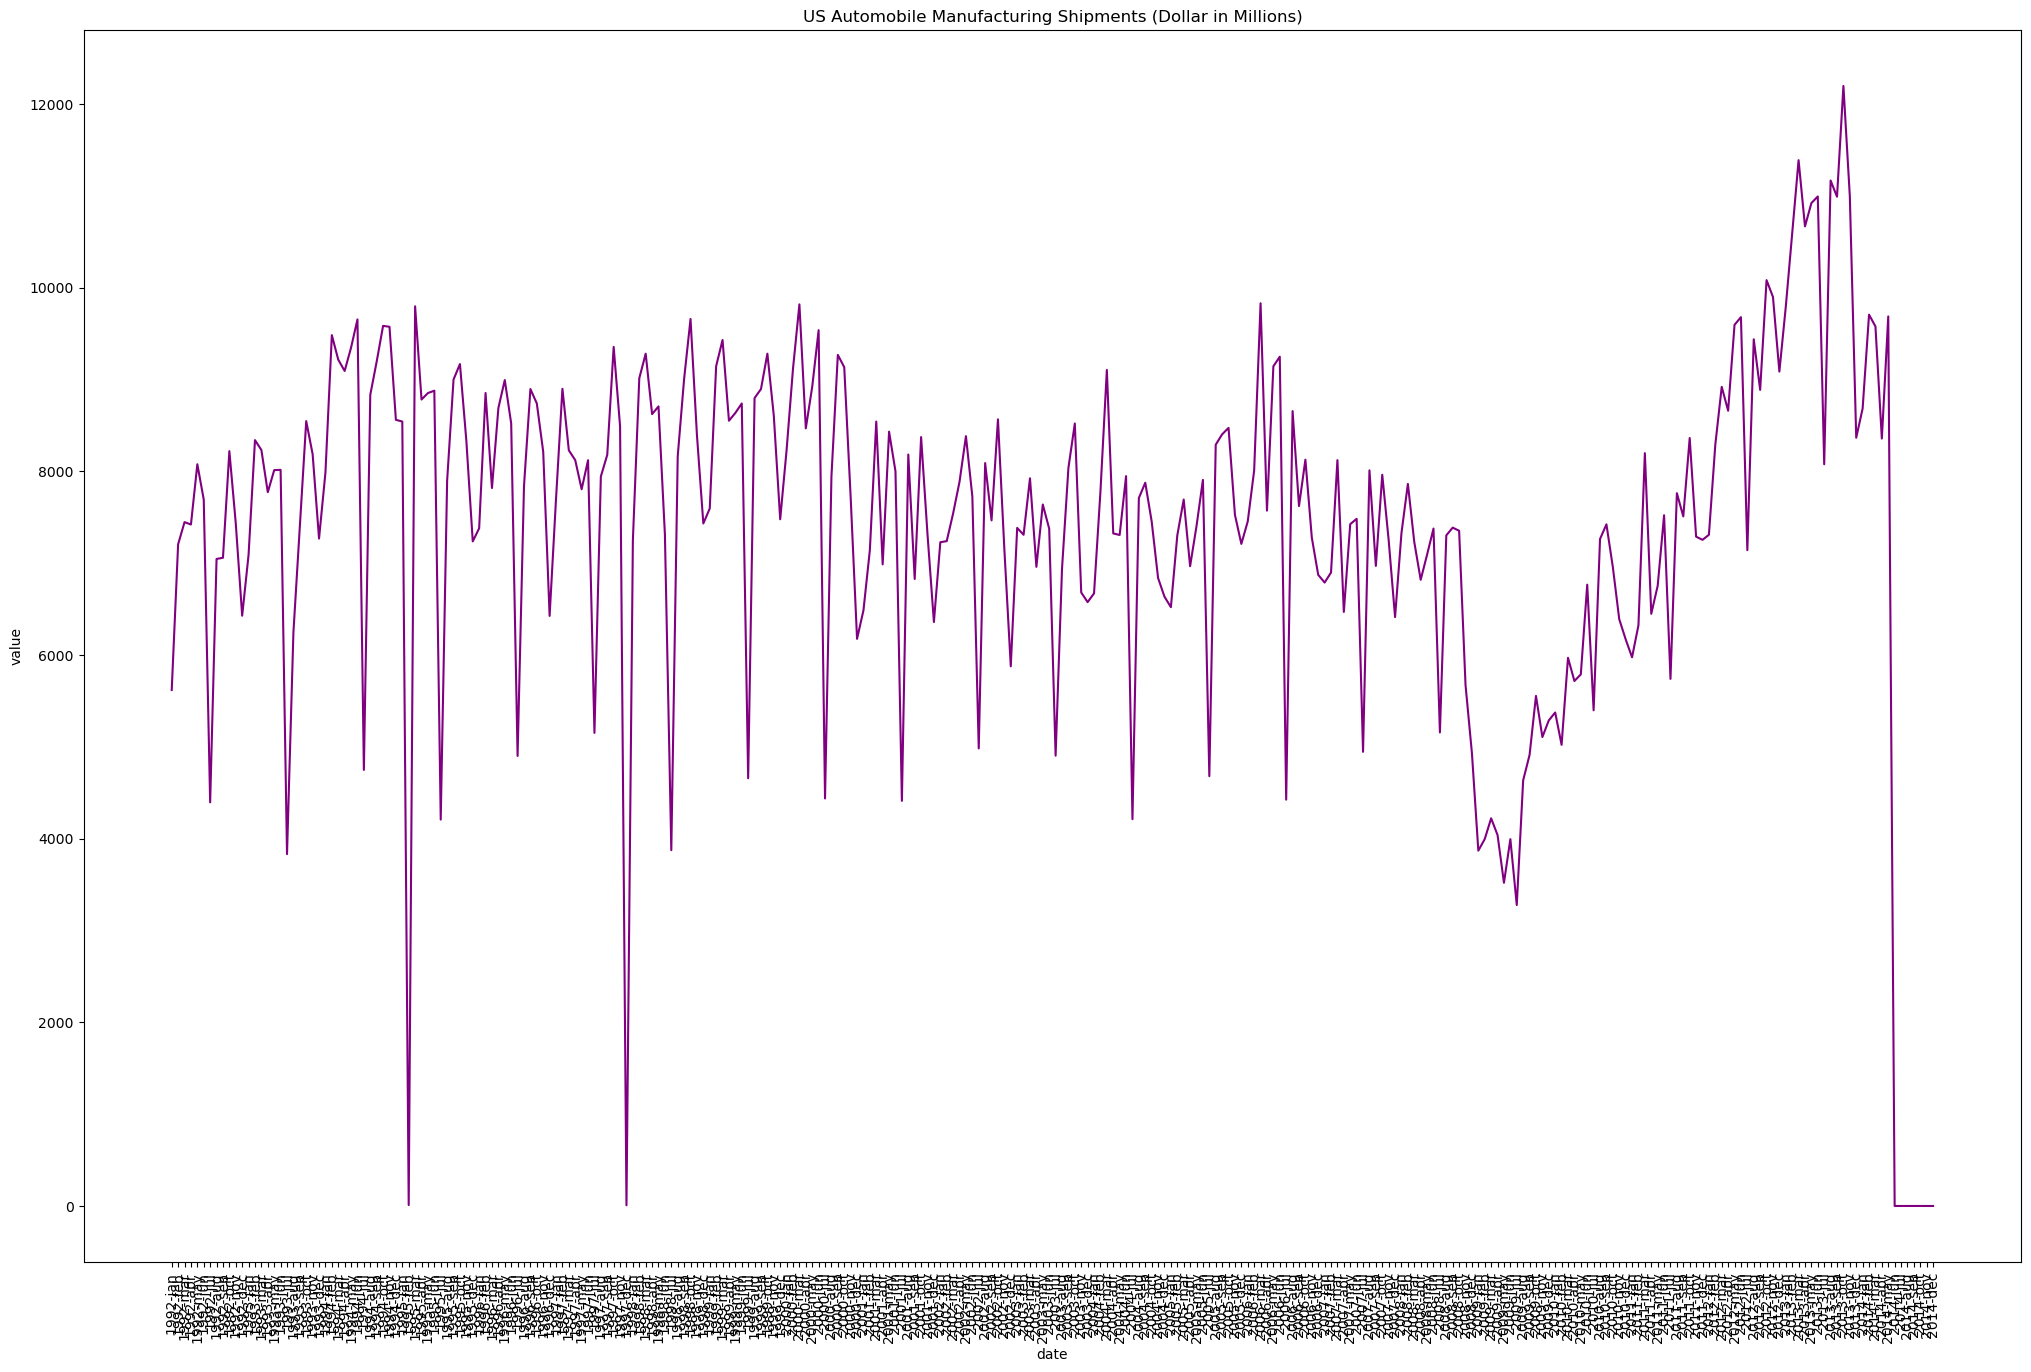

In [4]:
#B. plot data
months = ['jan', 'feb', 'mar', 'apr', 'may','jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
d_m_list = []
for year in data['year']:
    for month in months:
        d_m_list.append(str(year) + '-' + str(month))
values = data.iloc[:, 1:].values.flatten().tolist()
fig = plt.figure(figsize=(25, 16))
plt.plot(d_m_list, values, color = 'purple')
plt.xlabel('date')
plt.ylabel('value')
plt.title('US Automobile Manufacturing Shipments (Dollar in Millions)')
plt.xticks(rotation=90)
plt.show()

In [5]:
values

[5618.0,
 7205.0,
 7446.0,
 7420.0,
 8076.0,
 7692.0,
 4395.0,
 7045.0,
 7058.0,
 8219.0,
 7432.0,
 6427.0,
 7091.0,
 8339.0,
 8231.0,
 7772.0,
 8012.0,
 8015.0,
 3831.0,
 6246.0,
 7399.0,
 8546.0,
 8186.0,
 7267.0,
 7986.0,
 9482.0,
 9215.0,
 9092.0,
 9346.0,
 9653.0,
 4748.0,
 8832.0,
 9194.0,
 9583.0,
 9573.0,
 8560.0,
 8541.0,
 10.048,
 9796.0,
 8781.0,
 8851.0,
 8877.0,
 4207.0,
 7898.0,
 8999.0,
 9167.0,
 8333.0,
 7236.0,
 7379.0,
 8852.0,
 7817.0,
 8688.0,
 8993.0,
 8521.0,
 4900.0,
 7837.0,
 8895.0,
 8739.0,
 8213.0,
 6425.0,
 7698.0,
 8898.0,
 8228.0,
 8121.0,
 7804.0,
 8120.0,
 5151.0,
 7943.0,
 8179.0,
 9354.0,
 8490.0,
 7.38,
 7248.0,
 9013.0,
 9280.0,
 8622.0,
 8706.0,
 7312.0,
 3874.0,
 8162.0,
 9006.0,
 9658.0,
 8396.0,
 7431.0,
 7594.0,
 9144.0,
 9429.0,
 8550.0,
 8635.0,
 8738.0,
 4657.0,
 8797.0,
 8895.0,
 9280.0,
 8607.0,
 7477.0,
 8231.0,
 9117.0,
 9817.0,
 8467.0,
 8919.0,
 9536.0,
 4437.0,
 7941.0,
 9267.0,
 9133.0,
 7720.0,
 6175.0,
 6485.0,
 7142.0,
 8541.0,
 69

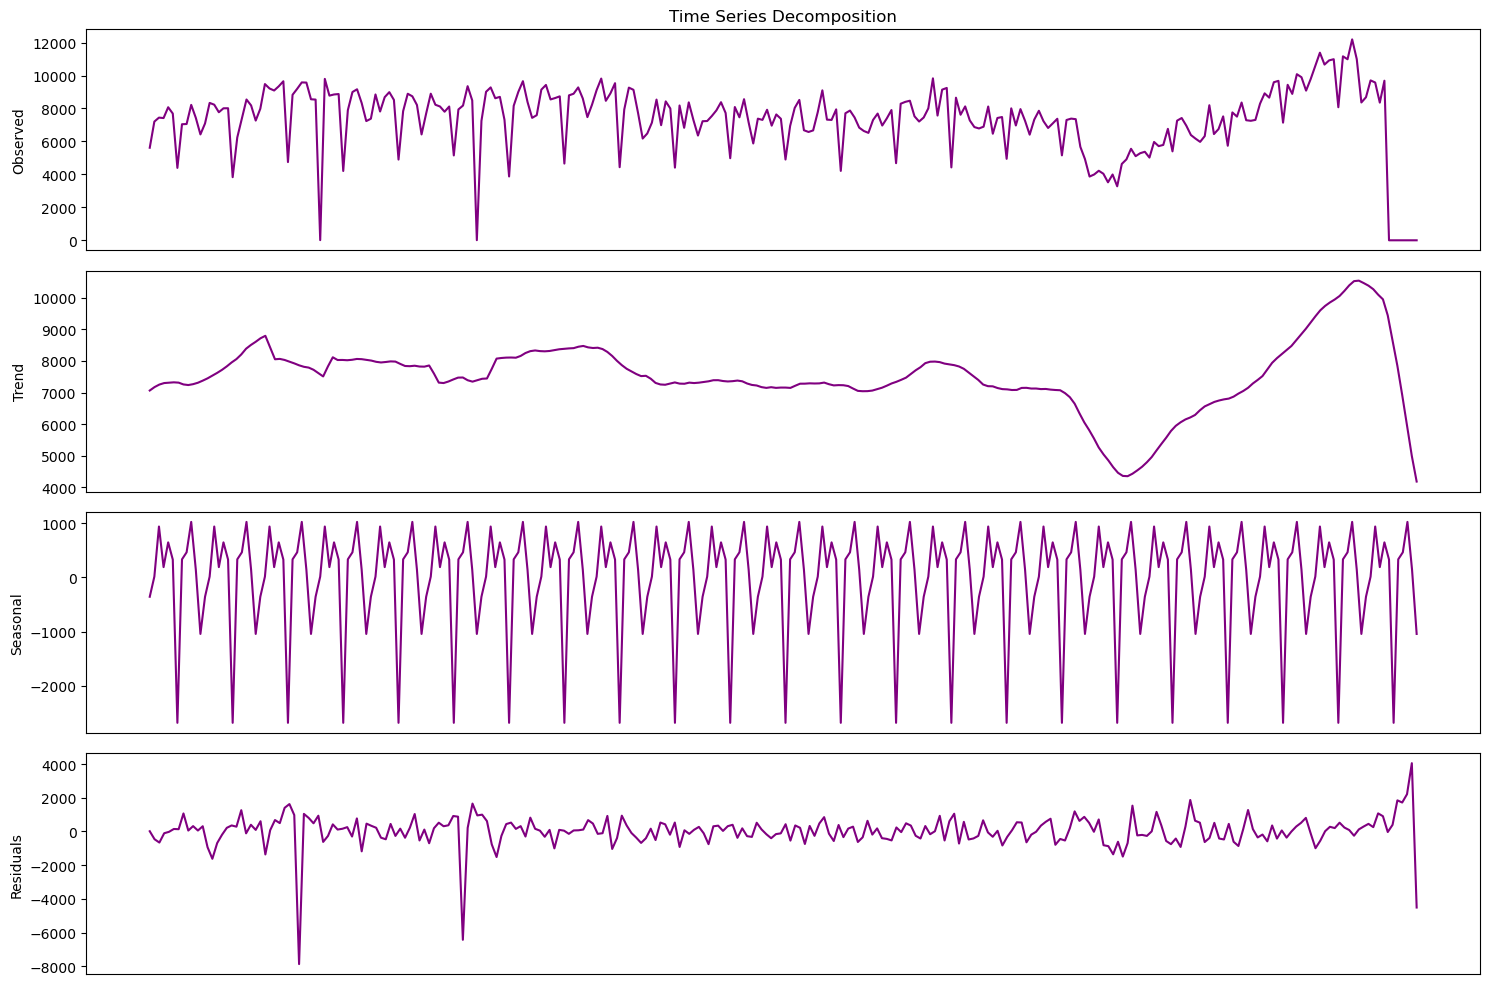

In [111]:
#C. Use time series decomposition to identify the presence of a periodic pattern. Why does a seasonal behavior occur?
period = 12  #specifying the period
decomposition = seasonal_decompose(values, model='additive', period = period)

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid
data.reset_index(inplace=True)

plt.figure(figsize=(15,10))
#Observed
plt.subplot(411)
plt.plot(values, color = 'purple')
plt.ylabel('Observed')
plt.title('Time Series Decomposition')
plt.xticks([], [])

#Trend
plt.subplot(412)
plt.plot(trend, color = 'purple')
plt.ylabel('Trend')
plt.xticks([], [])

#Seasonal
plt.subplot(413)
plt.plot(seasonal, color = 'purple')
plt.ylabel('Seasonal')
plt.xticks([], [])

#Residual 
plt.subplot(414)
plt.plot(residuals, color = 'purple')
plt.ylabel('Residuals')
plt.xticks([], [])

plt.tight_layout()
plt.show()

In [112]:
data_new = {
    'year-month': d_m_list,
    'values': values
}
data_year_month = pd.DataFrame(data_new)
print(data_year_month)

    year-month  values
0     1992-jan  5618.0
1     1992-feb  7205.0
2     1992-mar  7446.0
3     1992-apr  7420.0
4     1992-may  8076.0
..         ...     ...
271   2014-aug     0.0
272   2014-sep     0.0
273   2014-oct     0.0
274   2014-nov     0.0
275   2014-dec     0.0

[276 rows x 2 columns]


In [113]:
#D. Find the order of integration.
#using addfuller test
ADF_result = adfuller(data_year_month['values'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -3.611089258243689
p-value: 0.005552529787577041


In [114]:
differenced = data_year_month['values']

P-value is less than 0.05 which means that the process is stationary, we don't need to apply differencing and d = 0 (where d is the order of integration)

In [6]:
# E.Use the optimize_ARIMA function and select the model with the lowest AIC. 
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]
d = 0
D = 0
m = 12
ARIMA_order_list = list(product(ps, qs, Ps, Qs))

#Fit all unique ARIMA models:
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, m: int)-> pd.DataFrame:
    results = []
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1]), 
                seasonal_order=(order[2], D, order[3], m),
                simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC',
    ascending=True).reset_index(drop=True)
    return result_df

In [117]:
train = data_year_month['values'][:-19]
ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, m)
ARIMA_result_df

C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/169 [00:00<?, ?it/s]

C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Convergenc

C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Convergenc

C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Convergenc

C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Convergenc

(p,q,P,Q)          AIC
0    (10, 10, 0, 0)  4372.897946
1     (9, 10, 0, 0)  4374.827395
2    (11, 11, 0, 0)  4375.112656
3    (12, 12, 0, 0)  4376.066073
4      (9, 9, 0, 0)  4377.727588
..              ...          ...
164    (0, 7, 0, 0)  4920.413562
165    (0, 4, 0, 0)  4932.588296
166    (0, 2, 0, 0)  4934.505685
167    (0, 1, 0, 0)  5066.932855
168    (0, 0, 0, 0)  5326.935507

[169 rows x 2 columns]

This means that the best values of p and q are: p = 10, q = 10
So the ARIMA model with the lowest AIC is ARIMA(10, 0, 10)

C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\misch\anaconda3\envs\mipt-stats\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


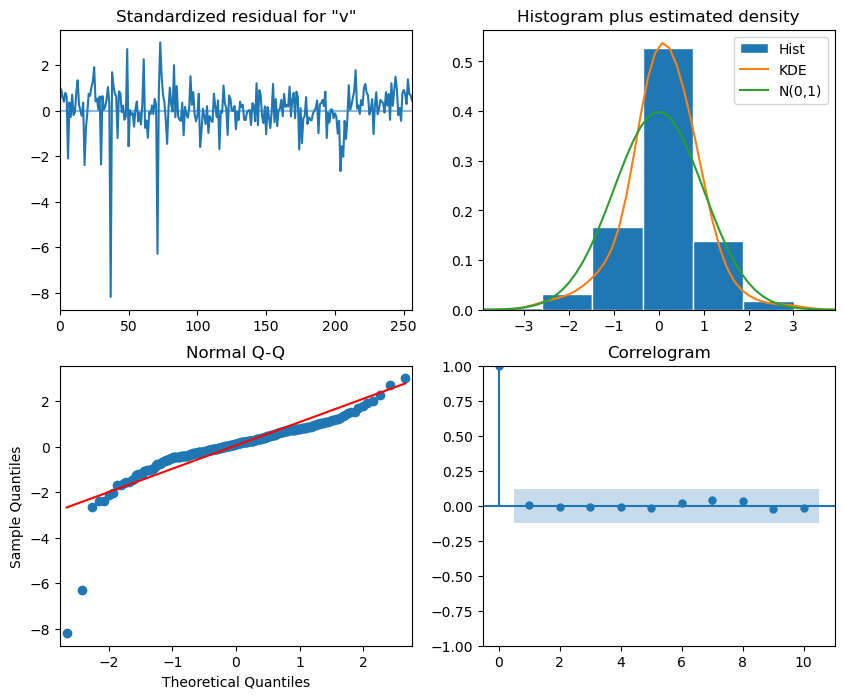

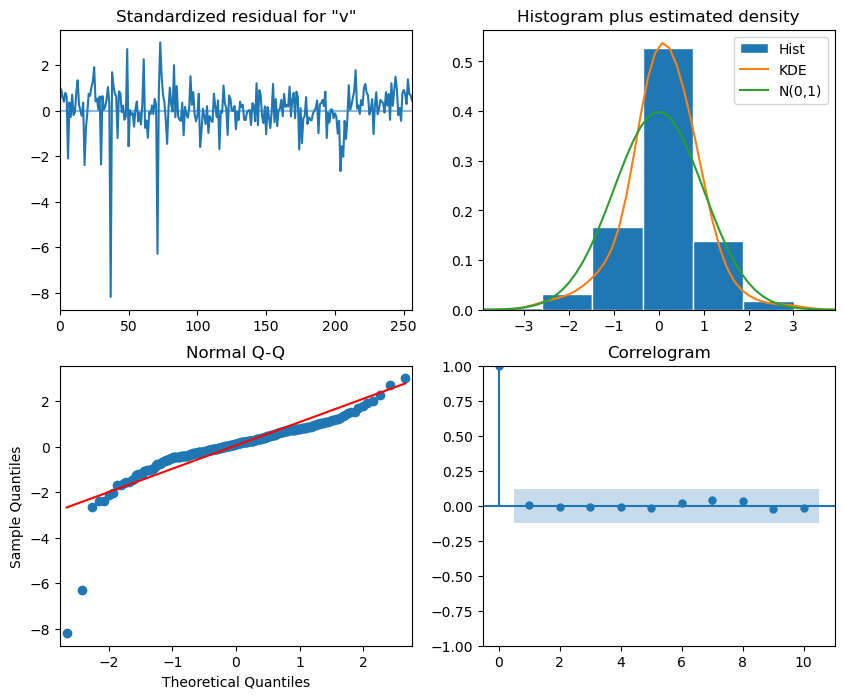

In [118]:
#F. Perform a residual analysis.
ARIMA_model = SARIMAX(train, order=(10,0,10), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
ARIMA_model_fit.plot_diagnostics(figsize=(10,8))

In [126]:
#ljung-Box test
residuals = ARIMA_model_fit.resid
lb = sm.stats.acorr_ljungbox(residuals, lags=10)
print(lb)

     lb_stat  lb_pvalue
1   0.238449   0.625329
2   0.243149   0.885525
3   0.243258   0.970321
4   0.250618   0.992775
5   0.262718   0.998286
6   0.562372   0.996995
7   0.936011   0.995796
8   1.134424   0.997248
9   1.141816   0.999035
10  1.225946   0.999566


In [127]:
#G. Develop an ARIMA model for forecasting shipments.
test['values'] = data_year_month['values'][-19:][:-7]
ARIMA_pred = ARIMA_model_fit.get_prediction(257, 268).predicted_mean
test['ARIMA_pred'] = ARIMA_pred

In [128]:
#H. Compare the performance of the ARIMA model against a baseline model of your choice. Use the MAPE.
test['naive_seasonal'] = data_year_month['values'].iloc[245:257].values

In [129]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [130]:
mape_naive_seasonal = mape(test['values'], test['naive_seasonal'])
mape_ARIMA = mape(test['values'], test['ARIMA_pred']) 

print("MAPE - Baseline model:", mape_naive_seasonal)
print("MAPE - ARIMA:", mape_ARIMA)

MAPE - Baseline model: 14.602695036882443
MAPE - ARIMA: 10.601984894787106


As it is seen the ARIMA model gives a better result than the naive seasonal method